In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
from google.colab import files
upload = files.upload()

Saving Airlines+Data.xlsx to Airlines+Data.xlsx


In [3]:
df = pd.read_excel("Airlines+Data.xlsx")
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


#EDA

In [4]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [5]:
df.shape

(96, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [7]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


<Axes: >

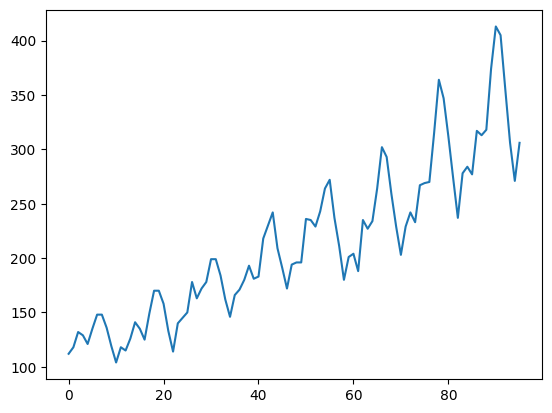

In [10]:
df['Passengers'].plot()

<Axes: >

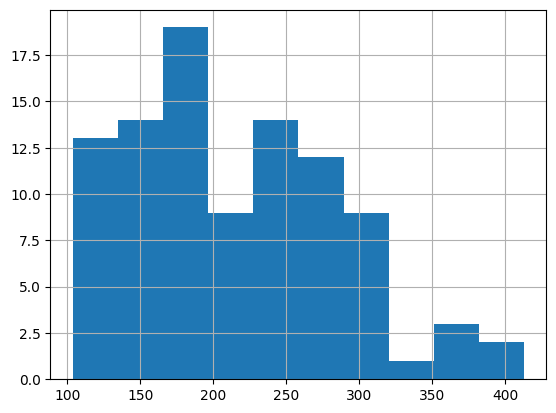

In [14]:
df['Passengers'].hist()

<Axes: ylabel='Density'>

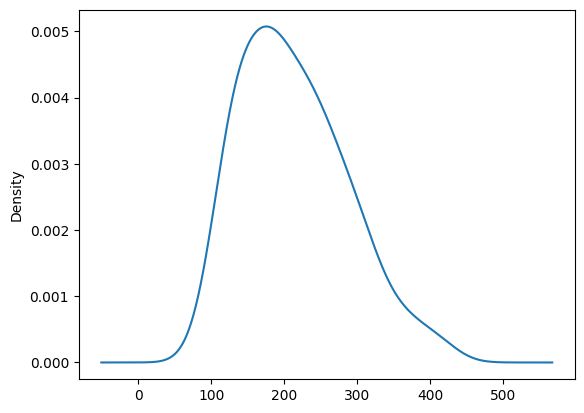

In [16]:
df['Passengers'].plot(kind='kde')

In [11]:
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

df['Month'] = pd.to_datetime(df['Month'])

df["Month_Year"] = df['Month'].dt.strftime("%b-%y")

P = df["Month_Year"][0]
P[0:3]
df["Months"] = 0
for i in range(96):
    df.loc[i, 'Months'] = df.loc[i, 'Month_Year'][0:3]

month_dummies = pd.DataFrame(pd.get_dummies(df['Months']))
month_dummies


df1 = pd.concat([df,month_dummies],axis = 1)

df1.rename(columns={"Month": 'Date'}, inplace=True)
df1["Year"] = df1.Date.dt.strftime("%Y") # year extraction
df1

,Date,Passengers,Month_Year,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Year
0,1995-01-01,112,Jan-95,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1995
1,1995-02-01,118,Feb-95,Feb,0,0,0,1,0,0,0,0,0,0,0,0,1995
2,1995-03-01,132,Mar-95,Mar,0,0,0,0,0,0,0,1,0,0,0,0,1995
3,1995-04-01,129,Apr-95,Apr,1,0,0,0,0,0,0,0,0,0,0,0,1995
4,1995-05-01,121,May-95,May,0,0,0,0,0,0,0,0,1,0,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug-02,Aug,0,1,0,0,0,0,0,0,0,0,0,0,2002
92,2002-09-01,355,Sep-02,Sep,0,0,0,0,0,0,0,0,0,0,0,1,2002
93,2002-10-01,306,Oct-02,Oct,0,0,0,0,0,0,0,0,0,0,1,0,2002
94,2002-11-01,271,Nov-02,Nov,0,0,0,0,0,0,0,0,0,1,0,0,2002


In [13]:
df1["t"]=np.arange(1,97)
df1["t_square"]=np.square(df1["t"])
df1["Log_Passengers"]=np.log(df1["Passengers"])
df1.head()

,Date,Passengers,Month_Year,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Year,t,t_square,Log_Passengers
0,1995-01-01,112,Jan-95,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1995,1,1,4.718499
1,1995-02-01,118,Feb-95,Feb,0,0,0,1,0,0,0,0,0,0,0,0,1995,2,4,4.770685
2,1995-03-01,132,Mar-95,Mar,0,0,0,0,0,0,0,1,0,0,0,0,1995,3,9,4.882802
3,1995-04-01,129,Apr-95,Apr,1,0,0,0,0,0,0,0,0,0,0,0,1995,4,16,4.859812
4,1995-05-01,121,May-95,May,0,0,0,0,0,0,0,0,1,0,0,0,1995,5,25,4.795791


<Axes: xlabel='Months', ylabel='Year'>

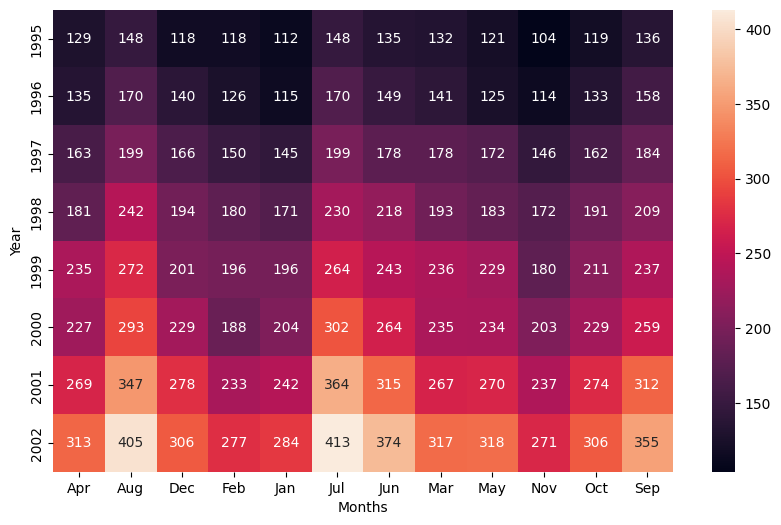

In [18]:
#Heat Map
plt.figure(figsize=(10,6))
Y_Quarter=pd.pivot_table( data=df1,values="Passengers",index="Year",columns="Months",aggfunc="mean",fill_value=0)
sns.heatmap(Y_Quarter,annot=True,fmt="2g")

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

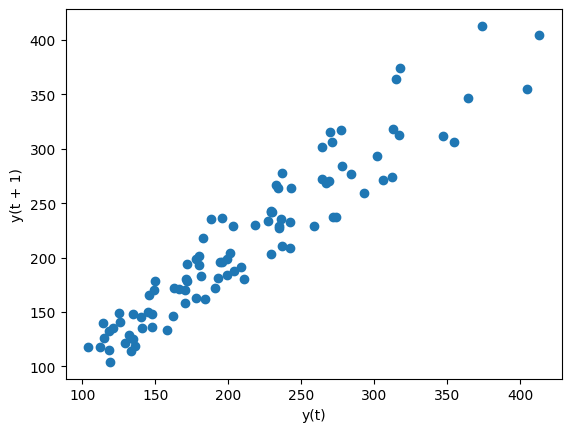

In [20]:
from pandas.plotting import lag_plot
lag_plot(df1.Passengers)

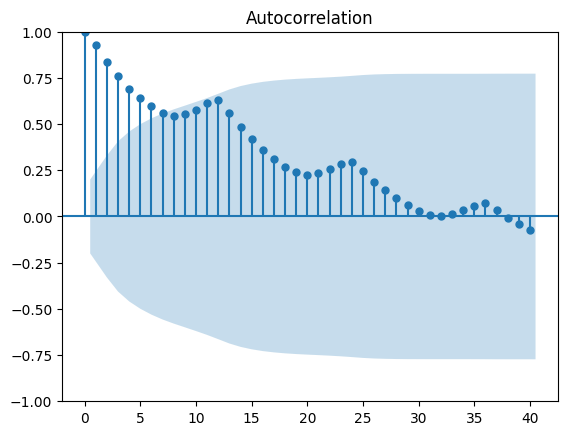

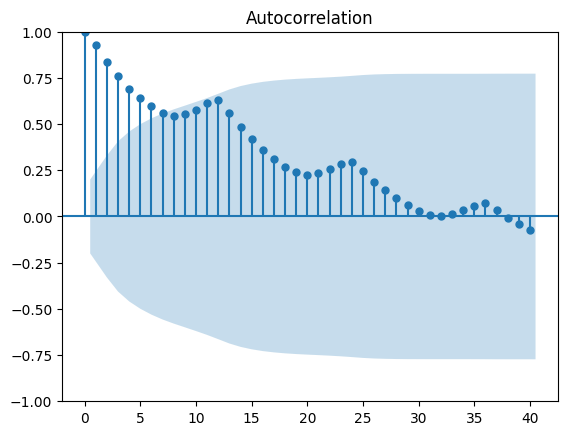

In [21]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df1.Passengers,lags=40)

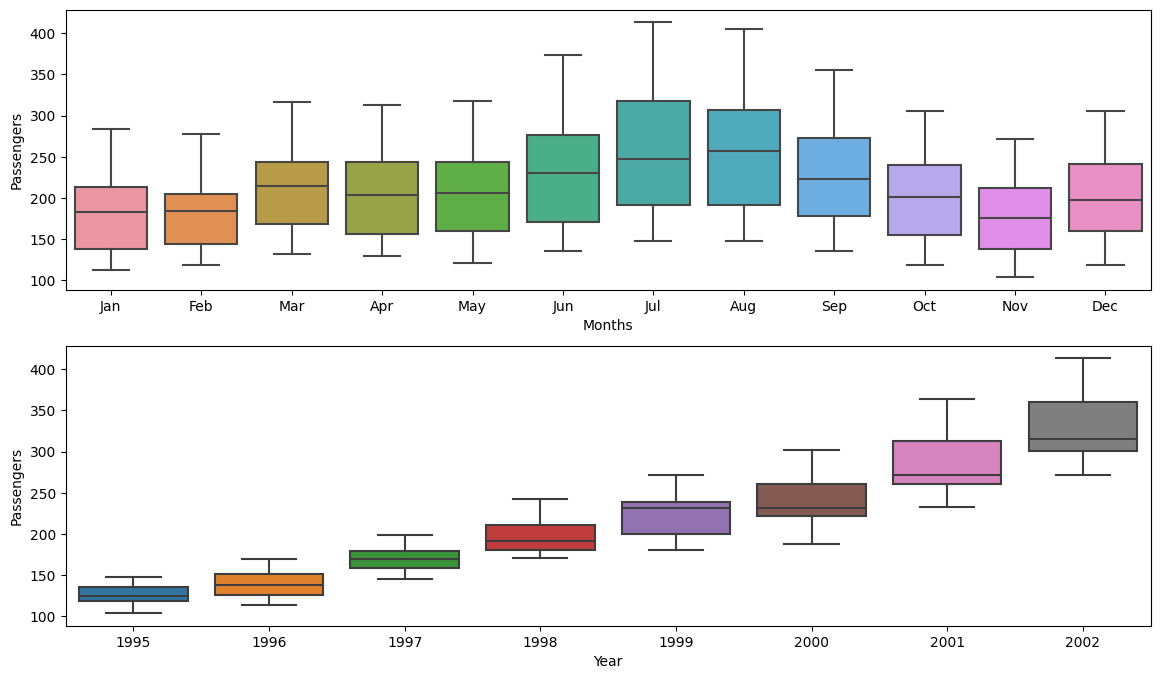

In [22]:
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="Months",y="Passengers",data=df1)
plt.subplot(212)
sns.boxplot(x="Year",y="Passengers",data=df1)
plt.show()

<Axes: xlabel='Months', ylabel='Passengers'>

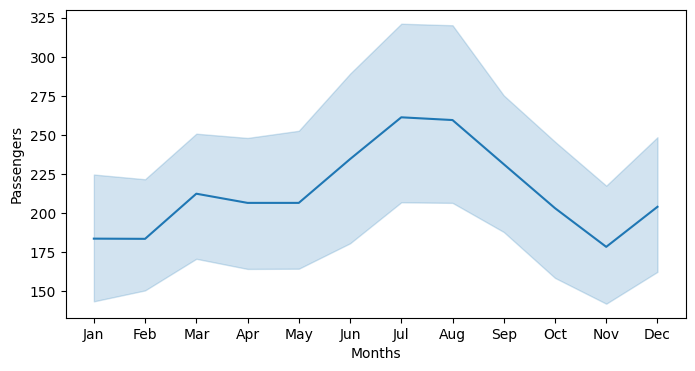

In [23]:
plt.figure(figsize=(8,4))
sns.lineplot(x="Months",y="Passengers",data=df1)

In [24]:
train=df1.head(int(len(df1.Date)*0.9))
test=df1.tail(len(df1.Date)-len(train))

In [25]:
train.shape, test.shape

((86, 20), (10, 20))

In [26]:
#Linear Model
Linear_model=smf.ols("Passengers~t",data=train).fit()
pred_linear=Linear_model.predict(test["t"])
rmse_linear=np.sqrt(np.mean(test["Passengers"]-np.array(pred_linear))**2)
rmse_linear

36.348563611491215

In [28]:
#Exponential
exp_model=smf.ols("Log_Passengers~t",data=train).fit()
pred_exp_model=exp_model.predict(test["t"])
rmse_exp_model=np.sqrt(np.mean((test["Passengers"])-(np.array(pred_exp_model)))**2)
rmse_exp_model

332.0234293338548

In [29]:
#Quadratic
Quad=smf.ols("Passengers~t+t_square",data=train).fit()
pred_Quad=Quad.predict(test[["t","t_square"]])
rmse_Quad=np.sqrt(np.mean((test["Passengers"])-(np.array(pred_Quad)))**2)
rmse_Quad

27.186702876829212

In [30]:
#Additive seasonality
Add_sea=smf.ols("Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=train).fit()
pred_add_sea=Add_sea.predict(test[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]])
rmse_add_sea=np.sqrt(np.mean(test["Passengers"]-(np.array(pred_add_sea)))**2)
rmse_add_sea

134.92857142857133

In [31]:
#Additive Seasonality Quadratic
add_sea_quad=smf.ols("Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=train).fit()
pred_add_sea_quad=add_sea_quad.predict(test[["t","t_square","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]])
rmse_add_sea_quad=np.sqrt(np.mean(test["Passengers"]-np.array((pred_add_sea_quad)))**2)
rmse_add_sea_quad

17.867248407437057

In [32]:
# Multiplicative Seasonality
mul_sea=smf.ols("Log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=train).fit()
pred_Mult_sea=mul_sea.predict(test[["Log_Passengers","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]])
rmse_Mult_sea=np.sqrt(np.mean(test["Passengers"]-(np.array(np.exp(pred_Mult_sea))))**2)
rmse_Mult_sea

142.41437402901596

In [33]:
#Multiplicative Additive Seasonality
mul_add_sea=smf.ols("Log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=train).fit()
pred_mul_add_sea=mul_add_sea.predict(test)
rmse_mul_add_sea=np.sqrt(np.mean(test["Passengers"]-(np.array(pred_mul_add_sea)))**2)
rmse_mul_add_sea

331.99428730249576

In [34]:
#Compare the results
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp_model","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_mul_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp_model,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_mul_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,17.867248
2,rmse_Quad,27.186703
0,rmse_linear,36.348564
3,rmse_add_sea,134.928571
5,rmse_Mult_sea,142.414374
6,rmse_mul_add_sea,331.994287
1,rmse_exp_model,332.023429


In this Forecasting problem, 'Additive Seasonality Quadratic' model showed the best performance.